<a href="https://colab.research.google.com/github/SaiDhinakar/cv-intro/blob/main/Image_featues_and_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE FEATURES AND IMAGE ALIGNMENT

## IMPORTS

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Download image from internet

In [ ]:
!wget "https://imgs.search.brave.com/LsEFS_80ZDoZ5M75hY4GTEGOaGlO4o6I38KmTIhzgcU/rs:fit:500:0:1:0/g:ce/aHR0cHM6Ly9tZWRp/YS5nZXR0eWltYWdl/cy5jb20vaWQvOTQ5/NDcyNzY4L3Bob3Rv/L3RpZ2VyLXBvcnRy/YWl0LmpwZz9zPTYx/Mng2MTImdz0wJms9/MjAmYz1jUEktaEl3/WHhMd1JZY0dXM0hh/Q18zQzZKX01NSUVf/QmJNakk5QWMwWE5F/PQ" -O "/content/image.jpg"
!wget "https://imgs.search.brave.com/Jql0KMO-IdjJ_bYukU-1as1bzFrII4S_49OZ1nEHkAY/rs:fit:500:0:1:0/g:ce/aHR0cHM6Ly9pLnBp/bmltZy5jb20vb3Jp/Z2luYWxzLzA2L2Y3/L2I0LzA2ZjdiNGQ3/ZTlhYTc0NGRmY2Q1/MmMwN2ZkNzVhNTI3/LmpwZw" -O "/content/image2.jpg"

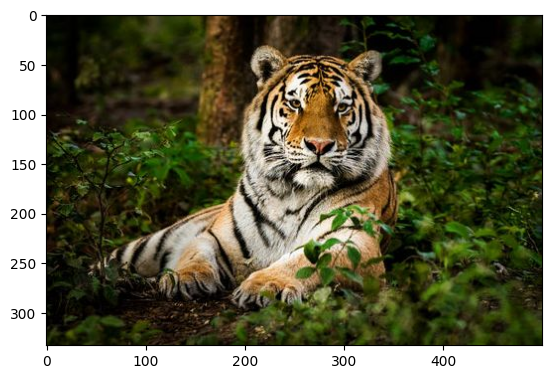

In [8]:
image = cv.imread("/content/image.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

### Image Transformation

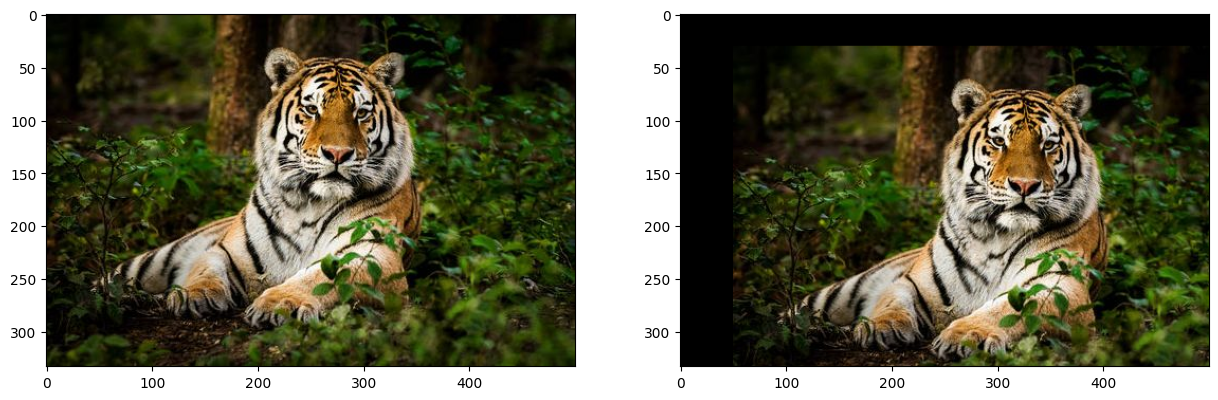

In [9]:
rows, cols = image.shape[:2]

# Define transformation matrix
M = np.float32([[1, 0, 50],   # x-axis shift
                [0, 1, 30]])  # y-axis shift

translated = cv.warpAffine(image, M, (cols, rows))

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(translated, cv.COLOR_BGR2RGB))
plt.show()

### Extracted ORB

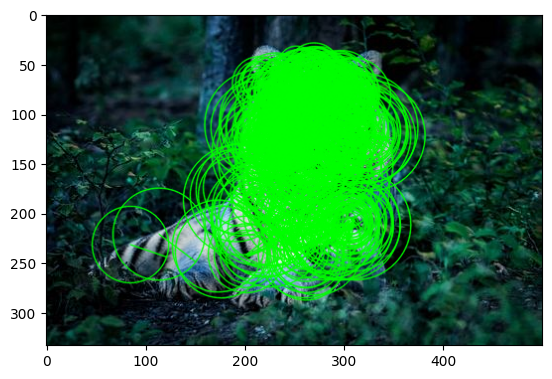

In [12]:
orb = cv.ORB_create()
keypoints, descriptors = orb.detectAndCompute(gray, None)
output = cv.drawKeypoints(image, keypoints, None, color=(0, 255, 0),flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(output)
plt.show()

### Feature matching

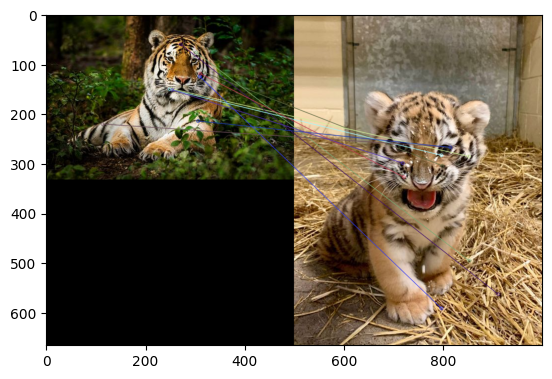

In [22]:
img1 = cv.imread('image.jpg')
img2 = cv.imread('image2.jpg')

orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Match features
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x:x.distance)

matched_img = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)

plt.imshow(cv.cvtColor(matched_img, cv.COLOR_BGR2RGB))
plt.show()


### Cloning

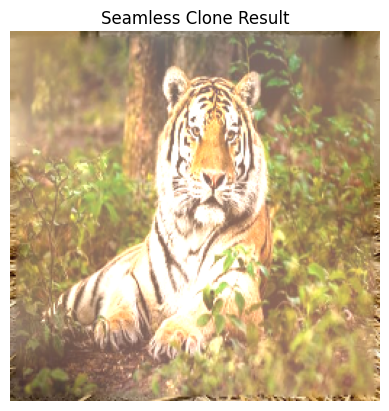

In [30]:
src = cv.imread("image.jpg")
dst = cv.imread("image2.jpg")

src = cv.resize(src, (255, 255))
dst = cv.resize(dst, (255, 255))

mask = 255 * np.ones(src.shape[:2], src.dtype)

center = (dst.shape[1] // 2, dst.shape[0] // 2)
output = cv.seamlessClone(src, dst, mask, center, cv.NORMAL_CLONE)

plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title("Seamless Clone Result")
plt.axis('off')
plt.show()